# Write your own Gradient Descent!

## The Algorithm

A simple gradient Descent Algorithm looks like this:


1. Obtain a function to minimize F(x)

2. Initialize a value x from which to start the descent or optimization from

3. Specify a learning rate that will determine how much of a step to descend by or how quickly you converge to the minimum value

4. Obtain the derivative of that value x (the descent)

5. Proceed to descend by the derivative of that value multiplied by the learning rate

6. Adjust the value of x

7. Check your stop condition to see whether to stop

8. If condition satisfied, stop. If not, proceed to step 4 with the new x value and keep repeating algorithm

## Let's implement this in Python

We will implement a simple representation of gradient descent using python. 

We will create an arbitrary loss function and attempt to find a local minimum value the range from -1 and 3 for that function 
f(x) = x³ — 3x² + 7 .

### Step 1

We will first visualize this function with a set of values ranging from -1 and 3 

In [3]:
# Your code here
# creating the function and plotting it 

def function(x):
    y = (x - 1) ** 2
    return y

def gradient(x):
    return 2 * (x - 1)

# Get 1000 evenly spaced numbers between -1 and 3 
# Gradient descent settings
learning_rate = 0.1
iterations = 20

# Starting point (random guess)
x_current = 3.0

# Store steps for plotting
x_history = [x_current]
y_history = [function(x_current)]

for i in range(iterations):
    grad = gradient(x_current)
    x_current = x_current - learning_rate * grad
    
    x_history.append(x_current)
    y_history.append(function(x_current))

# Plot the curve

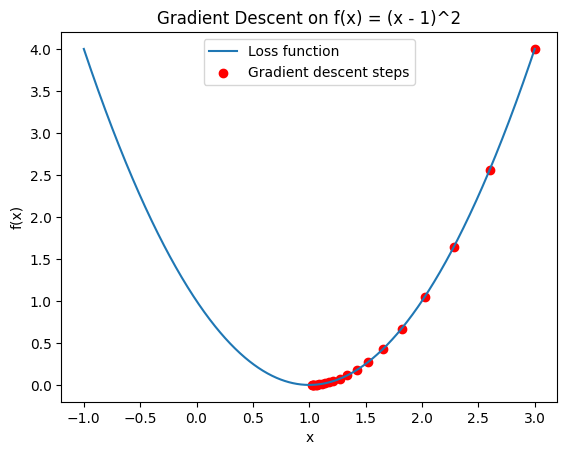

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the function
x = np.linspace(-1, 3, 1000)
y = function(x)

plt.plot(x, y, label="Loss function")
plt.scatter(x_history, y_history, color="red", label="Gradient descent steps")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on f(x) = (x - 1)^2")
plt.legend()
plt.show()

### Step 2

We will then proceed to make two functions for the gradient descent implementation.

The first is a derivative function: 

This function takes in a value of x and returns its derivative based on the initial function we specified. It is shown below:

In [9]:
def deriv(x):
    """
    Compute the derivative of the function

        f(x) = x³ - 3x²

    The derivative is

        f´(x) = 3x² - 6x
    Parameters
    ----------
    x : Input value at which the derivative is evaluated.

    Returns
    -------
    x_deriv: The value of the derivative f′(x) evaluated at x.
    """
    # Compute the derivative
    x_deriv = 3 * x**2 - 6 * x
    return x_deriv

In [12]:
deriv(7)

105

The second is the function where the actual gradient descent takes place. 

This function takes in an initial or previous value for x, updates it based on the step taken via the descent multiplied by the learning rate and outputs the most minimum value of x that reaches the stop condition. 



For our stop condition, we are going to use a precision stop.



This means that when the absolute difference between our old and updated x is smaller than a value, the algorithm should stop. 



The function will also print out the minimum value of x as well as the number of steps or descents it took to reach that value.

In [ ]:
# Your code here

def gradient_descent(x_new, x_prev, precision, l_r):
    
    """
    Description
    -----------
    This function performs gradient descent starting from an initial value of x.
    At each step, x is updated using the derivative of the function multiplied by
    the learning rate. The algorithm continues until a precision-based stopping
    condition is satisfied.

    The stopping condition is met when the absolute difference between successive
    x values is smaller than the specified precision.
    
    Arguments
    ---------
    x_new : Initial (current) value of x that will be updated during gradient descent.
    x_prev : Previous value of x used to check the stopping condition.
    precision : Threshold that determines when gradient descent should stop.
    l_r : Learning rate (size of each descent step).
        

    Output
    ------
    1. Prints the final x value, which corresponds to the local minimum reached.
    2. Prints the total number of gradient descent steps taken.
    3. Plots the gradient descent path over the function curve.

    Returns
    -------
    None
    """
    
    # Store all x values during gradient descent
    x_list = [...]

    # Store corresponding y = f(x) values
    y_list = [...]

    # Continue updating x until the change between iterations is smaller than precision
    while ... > precision:
        
        # Store current x value
        x_current = ...

        # Compute derivative of the function at current x
        x_deriv = ...

        # Update x using gradient descent
        # new x = current x - (learning rate * derivative)
        x_new = ...
        
        # Update previous x for precision check
        x_prev = ...

        # Append the updated x value to the list for plotting the descent path
        ...

        # Compute and store the corresponding y value for the updated x
        ...

    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_list)))
    
    # Create plot to show the gradient descent path 
    # over the function curve 
    
    plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Example function (use yours if already defined)
def function(x):
    return x**3 - 3*x**2

# Derivative (you already have this)
def deriv(x):
    return 3*x**2 - 6*x


def gradient_descent(x_new, x_prev, precision, l_r):
    """
    Performs gradient descent on f(x) starting from x_new until convergence.
    Stops when abs(x_new - x_prev) <= precision.
    Prints final x and number of steps, and plots the descent path.
    """
    
    # Store all x values during gradient descent
    x_list = [x_new]

    # Store corresponding y = f(x) values
    y_list = [function(x_new)]

    # Continue updating x until the change between iterations is smaller than precision
    while abs(x_new - x_prev) > precision:
        
        # Store current x value
        x_current = x_new

        # Compute derivative of the function at current x
        x_deriv = deriv(x_current)

        # Update x using gradient descent
        x_new = x_current - (l_r * x_deriv)
        
        # Update previous x for precision check
        x_prev = x_current

        # Append the updated x value to the list for plotting the descent path
        x_list.append(x_new)

        # Compute and store the corresponding y value for the updated x
        y_list.append(function(x_new))

    print("Local minimum occurs at: " + str(x_new))
    print("Number of steps: " + str(len(x_list)))

    # Plot the function curve
    x_curve = np.linspace(min(x_list) - 1, max(x_list) + 1, 400)
    y_curve = function(x_curve)

    plt.figure(figsize=(8, 5))
    plt.plot(x_curve, y_curve, label="f(x)")
    plt.scatter(x_list, y_list, color="red", s=30, label="Gradient descent steps")
    plt.plot(x_list, y_list, color="red", linewidth=1, alpha=0.7)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Gradient Descent Path")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

#### Step 4

Now we will use our two functions and see if they are working correctly.

Local minimum occurs at: 1.9980265135950486
Number of steps: 25


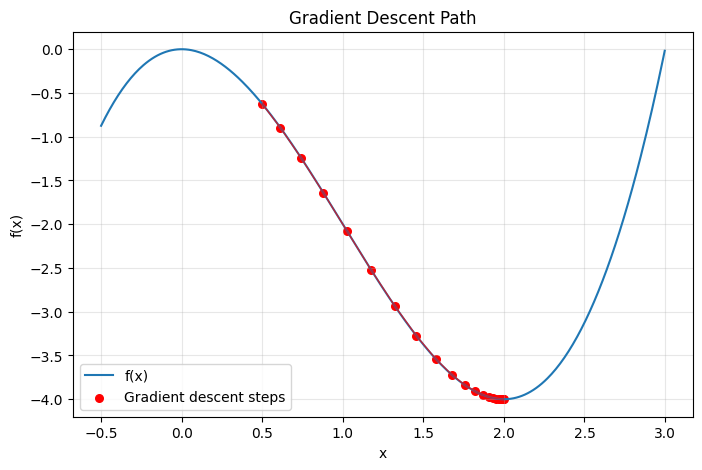

In [17]:
# Implement gradient descent (all the arguments are arbitrarily chosen)

gradient_descent(x_new=0.5, x_prev=0, precision=0.001, l_r=0.05)